<a href="https://colab.research.google.com/github/inhoblock/Data_science-Study/blob/main/Chapter04_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4_1

로지스틱 회귀

# 2개 이상의 클래스가 포함된 다중분류의 경우?

K 근접 이웃 모델을 이용해 타깃 데이터가 어떤 클래스인지 확률을 구할 수 있다.

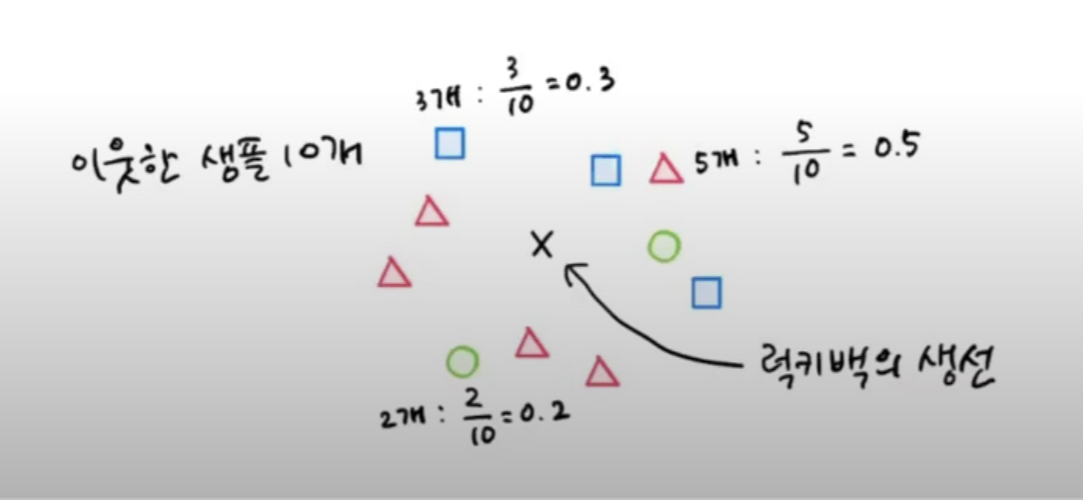

# 데이터 입력

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()
# 첫 5개의 데이터 확인

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
# Class 종류 확인
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [5]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

# species 는 문자열이지만 사전순으로 배열 후 정수(index)로 다룸.
fish_target = fish['Species'].to_numpy()

In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [7]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# K 근접 이웃 분류기의 확률 예측

In [9]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


타깃데이터의 값이 0 or 1 이 아니기 때문에 (7가지 값 가능) 정확도 점수가 조금 낮은것은 괜찮다.

In [11]:
# 이때 실제 class들의 순서는 데이터파일에서 pd.unique 로 구한 순서와는 다르기 때문에 주의해야 한다.
print(pd.unique(fish['Species']))
print(kn.classes_)

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [12]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 4)) # 반올림 자릿수 설정

print(kn.predict(test_scaled[:5]))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


K 근접 이웃 (n=3)의 경우 가능한 확률은 $\frac{0}{3}$, $\frac{1}{3}$, $\frac{2}{3}$, $\frac{3}{3}$ 네 가지가 전부이다. 

조금 더 좋은 분류 모델을 알아보자

# 로지스틱 회귀

로지스틱 회귀는 이름은 회귀이지만 분류 모델이다.

선형 회귀와 마찬가지로 선형 방정식을 학습한 뒤 시그모이드 함수(로지스틱 함수)를 이용해 0과 1 사이로 압축시킨다.

우리는 그 결과 값을 확률로 받아들인다.

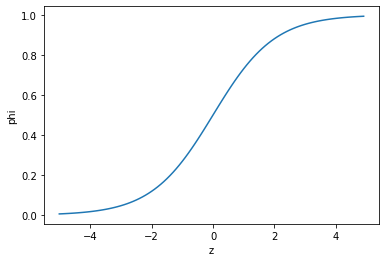

In [13]:
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

# 로지스틱 회귀를 이용한 이진 분류

In [14]:
char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


numpy 배열은 true, false 값을 전달하여 행을 선택할 수 있다.
이를 boolean indexing 이라 한다.

In [15]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes] 

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
print(lr.predict_proba(train_bream_smelt[:5]))
print(lr.predict(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]
['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


시그모이드 함수를 적용하기 전 선형모델 또한 구할 수 있다.

본 예제의 경우 5개의 특성을 사용하고 있으므로,

z = a*(weight) + b*(length) + c*(diagonal) + d*(height) + e(width) + f 형태를 띄고 있다.

decision_function 함수를 이용해 z값을 구할 수 있고, expit 함수를 이용해 시그모이드 함수를 적용할 수 있다.

In [18]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [19]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [20]:
from scipy.special import expit

print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


# 로지스틱 회귀를 이용한 다중 분류

시그모이드 함수는 생긴 것만 봐도 이진 분류를 위한 모델이다.

따라서 로지스틱 회귀를 이용한 다중 분류의 경우 각각의 target값에 대해
phi(z1), phi(z2), ..., phi(zn)을 따로 구해줘야 한다.

(ex. phi(z1) : 도미이냐 아니냐)

n 번의 이진분류 후 가장 높은 값을 반환하는 클래스를 예측하면 된다.

이때 문제는 phi(z)들의 합이 1이 아니라는 것이다.

이를 해결하기 위해 소프트맥스 함수를 이용한다.

In [21]:
lr = LogisticRegression( C = 20, max_iter = 1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


LogisticRegression의 경우 기본적으로 L2규제를 적용한다.

주의할 점은 앞서 배운 릿지모델의 alpha와 달리 c값이 작을수록 규제 강도가 커진다는 것이다.

In [23]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 3))

print(lr.predict(test_scaled[:5]))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [25]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


7개의 target데이터에 대해 각각 linear regression 모델이 존재한다는 것을 알 수 있다.

# decision_function 에 직접 소프트맥스 함수를 적용해보자.

In [24]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals = 2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [26]:
from scipy.special import softmax

# axis 는 한 행을 기준으로 적용한다는 의미이다.
proba = softmax(decision, axis = 1)
print(np.round(proba, decimals = 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


LogisticRegression 결과와 정확히 일치한다.

# Result.

각각의 데이터에 대하여 여러 번 이진 분류 후 소프트맥스 함수를 적용하는 과정이 불필요하게 번거로워 보였다.

처음부터 7개의 값 중 하나를 반환하는 선형 회귀 모델을 만들면 되지 않나?

생각해보니 이 경우는 회귀 -> 분류 과정을 거쳐야 확률을 구할 수 있는데, 분류 과정이 다중 분류이다.

분류와 회귀 과정을 조합해서 확률을 구하는 것도 놀라운데
분류 -> 회귀 순서가 필연적이라는 것에 또 놀랐다.

처음 내 의심과는 달리 로지스틱 회귀는 매우 합리적인 모델이었다.